# 3.1 Churn prediction
Dataset: https://www.kaggle.com/datasets/blastchar/telco-customer-churn/data

In [165]:
# !kaggle datasets download blastchar/telco-customer-churn
# !unzip telco-customer-churn.zip && rm telco-customer-churn.zip

# 3.2 Data preparation

In [166]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [167]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Clean column names and categorical variables

In [168]:
# easy way to see all columns in dataframe
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [169]:
# clean column names
df.columns = df.columns.str.lower().str.replace(' ', '_')

# clean categorical column data as well
categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in categorical_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


## Inspect data

In [170]:
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

In [171]:
df.totalcharges.describe()

count     7043
unique    6531
top          _
freq        11
Name: totalcharges, dtype: object

In [172]:
df[df.totalcharges == '_'] # _ denotes no amount charged to the customer

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
488,4472-lvygi,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,yes,bank_transfer_(automatic),52.55,_,no
753,3115-czmzd,male,0,no,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.25,_,no
936,5709-lvoeq,female,0,yes,yes,0,yes,no,dsl,yes,...,yes,no,yes,yes,two_year,no,mailed_check,80.85,_,no
1082,4367-nuyao,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.75,_,no
1340,1371-dwpaz,female,0,yes,yes,0,no,no_phone_service,dsl,yes,...,yes,yes,yes,no,two_year,no,credit_card_(automatic),56.05,_,no
3331,7644-omvmy,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.85,_,no
3826,3213-vvolg,male,0,yes,yes,0,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,25.35,_,no
4380,2520-sgtta,female,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.00,_,no
5218,2923-arzlg,male,0,yes,yes,0,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,one_year,yes,mailed_check,19.70,_,no
6670,4075-wkniu,female,0,yes,yes,0,yes,yes,dsl,no,...,yes,yes,yes,no,two_year,no,mailed_check,73.35,_,no


In [173]:
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges


In [174]:
# totalcharges is an object and not a number
tc = pd.to_numeric(df.totalcharges, errors='coerce') # _ will be replaced with NaN

In [175]:
df[tc.isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,_
753,3115-czmzd,_
936,5709-lvoeq,_
1082,4367-nuyao,_
1340,1371-dwpaz,_
3331,7644-omvmy,_
3826,3213-vvolg,_
4380,2520-sgtta,_
5218,2923-arzlg,_
6670,4075-wkniu,_


In [176]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')

In [177]:
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges
488,4472-lvygi,NaN
753,3115-czmzd,NaN
936,5709-lvoeq,NaN
1082,4367-nuyao,NaN
1340,1371-dwpaz,NaN
3331,7644-omvmy,NaN
3826,3213-vvolg,NaN
4380,2520-sgtta,NaN
5218,2923-arzlg,NaN
6670,4075-wkniu,NaN


In [178]:
df.totalcharges = df.totalcharges.fillna(0)
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]

,customerid,totalcharges


## Inspect churn variable

In [179]:
df.churn # interested in numbers and not objects

0        no
1        no
2       yes
3        no
4       yes
       ... 
7038     no
7039     no
7040     no
7041    yes
7042     no
Name: churn, Length: 7043, dtype: object

In [180]:
df.churn.value_counts()

churn
no     5174
yes    1869
Name: count, dtype: int64

In [181]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [182]:
df.churn = (df.churn == 'yes').astype(int)
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,...,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


# 3.3 Setting up the validation framework

In [183]:
from sklearn.model_selection import train_test_split


In [184]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [185]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
len(df_full_train), len(df_test)

(5634, 1409)

In [186]:
(20/80) * 100

25.0

In [187]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val)

(4225, 1409)

In [188]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [189]:
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [190]:
y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

In [191]:
# delete to avoid using it as a feature by mistake - to avoid data leakage and overfitting
del df_train['churn']
del df_val['churn']
del df_test['churn']

# 3.4 EDA

In [192]:
df_full_train.reset_index(drop=True, inplace=True)

In [193]:
df_full_train.isnull().sum() # no missing values

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

Data is imbalanced

In [194]:
df_full_train.churn.value_counts() # get distribution of churn values

churn
0    4113
1    1521
Name: count, dtype: int64

In [195]:
df_full_train.churn.value_counts(normalize=True) 

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

churn rate (fraction of 1s, or customers who leave in the dataset) is ~27%

In [196]:
global_churn_rate = df_full_train.churn.mean() 
round(global_churn_rate, 2)

np.float64(0.27)

- We have 3 numerical variables: tenure, monthlycharges, totalcharges
- The rest are categorical variables. Including seniorcitizen which has 1s and 0s

In [197]:
df_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
dtype: object

In [198]:
numerical = ['tenure', 'monthlycharges', 'totalcharges']
categorical = list(set(df.columns.to_list()) - set(numerical + ['churn', 'customerid']))

In [199]:
df_full_train[categorical].nunique() # unique values per column

onlinesecurity      3
contract            3
partner             2
paymentmethod       4
techsupport         3
internetservice     3
paperlessbilling    2
gender              2
onlinebackup        3
phoneservice        2
streamingmovies     3
dependents          2
deviceprotection    3
seniorcitizen       2
streamingtv         3
multiplelines       3
dtype: int64

# 3.5 Feature importance: Churn rate and risk ratio
Feature importance analyisis is part of EDA. It is a way of identifying features that affect the target variable. We'll look at:

- Churn rate
- Risk ratio
- Mutual information

## Churn rate
Look at churn rate per group

## Ways of measuring feature importance

1. Churn rate difference: Difference between group variable and global churn rate (or vice versa, doesn't matter): 
    - If difference < 1, global churn rate is higher and the group is less likely to churn 
    - If difference > 1, global churn rate is lower and the group is more likely to churn
    - We are interested in higher differences
    - Shows probaility of churn in an absolute way (+ve or -ve)
1. Risk ratio: Divide the group variable by the global churn rate 
    - If risk ratio < 1, global churn rate is lower and the group is less likely to churn
    - If risk ratio > 1, global churn rate is higher and the group is more likely to churn
    - We are interested in higher risk ratios
    - Shows probaility of churn in a relative way (%)

In [200]:
df_full_train.gender.value_counts()

gender
male      2838
female    2796
Name: count, dtype: int64

In [201]:
# very close with the global churn rate
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()

print(f"global_churn_rate: {round(global_churn_rate, 2)}")
print(f"churn_female: {round(churn_female, 2)}")
print(f"churn_male: {round(churn_male, 2)}")

global_churn_rate: 0.27
churn_female: 0.28
churn_male: 0.26


In [202]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [203]:
# churn rate higher than global rate for customers without partners (~6% higher)
churn_has_partner = df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_no_partner = df_full_train[df_full_train.partner == 'no'].churn.mean()

print(f"global_churn_rate: {round(global_churn_rate, 2)}")
print(f"churn_has_partner: {round(churn_has_partner, 2)} - churn rate difference: {round(churn_has_partner - global_churn_rate, 2)} - risk ratio: {round(churn_has_partner / global_churn_rate, 2)}")
print(f"churn_no_partner: {round(churn_no_partner, 2)} - churn rate difference: {round(churn_no_partner - global_churn_rate, 2)} - risk ratio: {round(churn_no_partner / global_churn_rate, 2)}")

global_churn_rate: 0.27
churn_has_partner: 0.21 - churn rate difference: -0.06 - risk ratio: 0.76
churn_no_partner: 0.33 - churn rate difference: 0.06 - risk ratio: 1.22


## Risk ratio

- No partner group: ~22% more likely to churn than global population
- Has partner group: ~25% less likely to churn than global population
- Female and male groups: same risk to churn as global population

In [204]:
churn_data = {
    'group': ['female', 'male', 'has_partner', 'no_partner'],
    'churn_rate': [churn_female, churn_male, churn_has_partner, churn_no_partner]
}

churn_data_df = pd.DataFrame(churn_data)
churn_data_df['difference'] = churn_data_df['churn_rate'] - global_churn_rate
churn_data_df['risk_ratio'] = churn_data_df['churn_rate'] / global_churn_rate

churn_data_df

,group,churn_rate,difference,risk_ratio
0,female,0.276824,0.006856,1.025396
1,male,0.263214,-0.006755,0.974980
2,has_partner,0.205033,-0.064935,0.759472
3,no_partner,0.329809,0.059841,1.221659


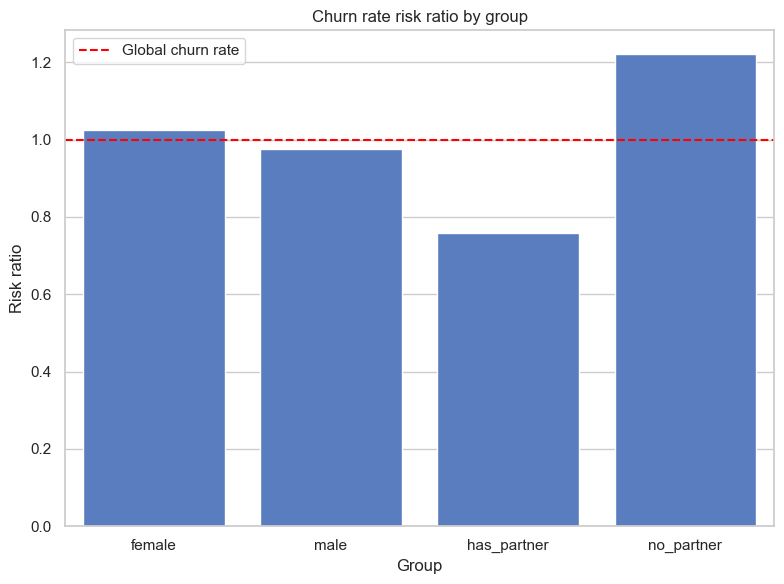

In [205]:
plt.figure(figsize=(8, 6))

sns.set_theme(style="whitegrid", palette="muted")
sns.barplot(x='group', y='risk_ratio', data=churn_data_df)
plt.axhline(1, color='red', linestyle='--', label='Global churn rate')

plt.title('Churn rate risk ratio by group')
plt.ylabel('Risk ratio')
plt.xlabel('Group')

plt.legend()
plt.tight_layout()
plt.show()

- From the data someone who lives with a partner, is male, has dependants and has a two year contract is less likely to churn than someone who lives alone, is female with no dependants and has a month-to-month contract
- More insights can be gained from the data by looking at the risk ratio of the churn rate for each group

In [206]:
for col in categorical:
    df_group = df_full_train.groupby(col).churn.agg(['mean', 'count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk_ratio'] = df_group['mean'] / global_churn_rate

    display(df_group)

,mean,count,diff,risk_ratio
onlinesecurity,,,,
no,0.420921,2801,0.150953,1.559152
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.153226,1612,-0.116742,0.567570


,mean,count,diff,risk_ratio
contract,,,,
month-to-month,0.431701,3104,0.161733,1.599082
one_year,0.120573,1186,-0.149395,0.446621
two_year,0.028274,1344,-0.241694,0.104730


,mean,count,diff,risk_ratio
partner,,,,
no,0.329809,2932,0.059841,1.221659
yes,0.205033,2702,-0.064935,0.759472


,mean,count,diff,risk_ratio
paymentmethod,,,,
bank_transfer_(automatic),0.168171,1219,-0.101797,0.622928
credit_card_(automatic),0.164339,1217,-0.105630,0.608733
electronic_check,0.455890,1893,0.185922,1.688682
mailed_check,0.193870,1305,-0.076098,0.718121


,mean,count,diff,risk_ratio
techsupport,,,,
no,0.418914,2781,0.148946,1.551717
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.159926,1632,-0.110042,0.592390


,mean,count,diff,risk_ratio
internetservice,,,,
dsl,0.192347,1934,-0.077621,0.712482
fiber_optic,0.425171,2479,0.155203,1.574895
no,0.077805,1221,-0.192163,0.288201


,mean,count,diff,risk_ratio
paperlessbilling,,,,
no,0.172071,2313,-0.097897,0.637375
yes,0.338151,3321,0.068183,1.252560


,mean,count,diff,risk_ratio
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


,mean,count,diff,risk_ratio
onlinebackup,,,,
no,0.404323,2498,0.134355,1.497672
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.217232,1915,-0.052736,0.804660


,mean,count,diff,risk_ratio
phoneservice,,,,
no,0.241316,547,-0.028652,0.893870
yes,0.273049,5087,0.003081,1.011412


,mean,count,diff,risk_ratio
streamingmovies,,,,
no,0.338906,2213,0.068938,1.255358
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.307273,2200,0.037305,1.138182


,mean,count,diff,risk_ratio
dependents,,,,
no,0.313760,3968,0.043792,1.162212
yes,0.165666,1666,-0.104302,0.613651


,mean,count,diff,risk_ratio
deviceprotection,,,,
no,0.395875,2473,0.125907,1.466379
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.230412,1940,-0.039556,0.853480


,mean,count,diff,risk_ratio
seniorcitizen,,,,
0,0.242270,4722,-0.027698,0.897403
1,0.413377,912,0.143409,1.531208


,mean,count,diff,risk_ratio
streamingtv,,,,
no,0.342832,2246,0.072864,1.269897
no_internet_service,0.077805,1221,-0.192163,0.288201
yes,0.302723,2167,0.032755,1.121328


,mean,count,diff,risk_ratio
multiplelines,,,,
no,0.257407,2700,-0.012561,0.953474
no_phone_service,0.241316,547,-0.028652,0.893870
yes,0.290742,2387,0.020773,1.076948
